In [1]:
# This notebook contains code to visualize distribution of means drawn from prior distribution

In [2]:
%pylab inline
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [3]:
def main():
    mu, sigma = np.log(0.0003), np.log(30)
    s = []
    for i in range (0, 10000):
        k = np.random.uniform()
        mean = np.random.lognormal(mu, sigma)
        theta = mean/k
        s.append(mean)

    svals = [0, 0, 0, 0] 
    for elem in s:
        if elem < 10**-4:
            svals[0] += 1
        elif elem < 10**-3:
            svals[1] += 1
        elif elem < 10**-2:
            svals[2] += 1
        elif elem >= 10**-2:
            svals[3] += 1

    print('Median mean')
    print(np.median(s))

    # Plot pdf of gamma distribution
    fig_num = 1
    plt.figure(fig_num)
    plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) 
    plt.xlabel("Mean")
    plt.ylabel("Density")
    plt.title("Distribution of means drawn from prior")
    plt.xticks(rotation=15) 

    # Plot discrete pdf of distribution of means
    fig_num = fig_num + 1
    plt.figure(fig_num)
    x = ['0<=mean<10^-4', '10^-4<=mean<10^-3', '10^-3<=mean<10^-2', 'mean>=10^-2']
    y_pos = np.arange(len(x))
    barWidth = 0.2
    r1 = np.arange(len(x))

    # Normalize mean values
    total = sum(svals)
    for i in range(0, len(svals)):
        svals[i] = svals[i]/total

    plt.bar(r1, svals, color='red', width=barWidth) 
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    plt.xticks(rotation=15) 
    plt.xlabel("Mean values")
    plt.ylabel("Probability")
    plt.title("Prior for mean of gamma distribution") 

Median mean
0.00031513657441240527
CPU times: user 218 ms, sys: 26.8 ms, total: 245 ms
Wall time: 443 ms


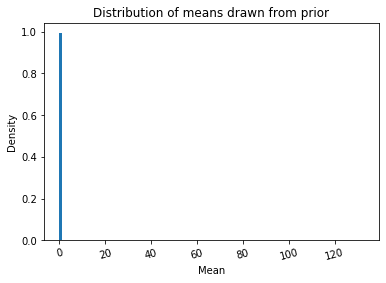

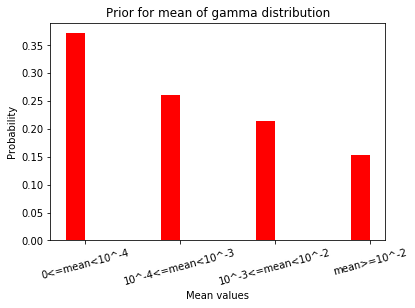

In [4]:
%%time
if __name__ == '__main__':
    main()